# Fase 2: Visualización

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 


pd.set_option('display.max_columns', None)



In [119]:
df_Loyalty = pd.read_csv("Customer Loyalty Analisis.csv")

## Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres:

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?

In [120]:
df_Loyalty.dtypes

Loyalty Number                   int64
Year                             int64
Month                           object
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                object
Cancellation Year               object
Cancellation Month              object
dtype: object

In [121]:
# El primer paso, es crear una variable donde agruparemos los datos de vuelos reservador por mes y año. 
monthly_flights = df_Loyalty.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
monthly_flights

,Year,Month,Flights Booked
0,2017,Apr,55669
1,2017,Aug,78629
2,2017,Dec,77581
3,2017,Feb,47664
4,2017,Jan,47727
5,2017,Jul,89226
6,2017,Jun,80452
7,2017,March,64235
8,2017,May,65223
9,2017,Nov,56859


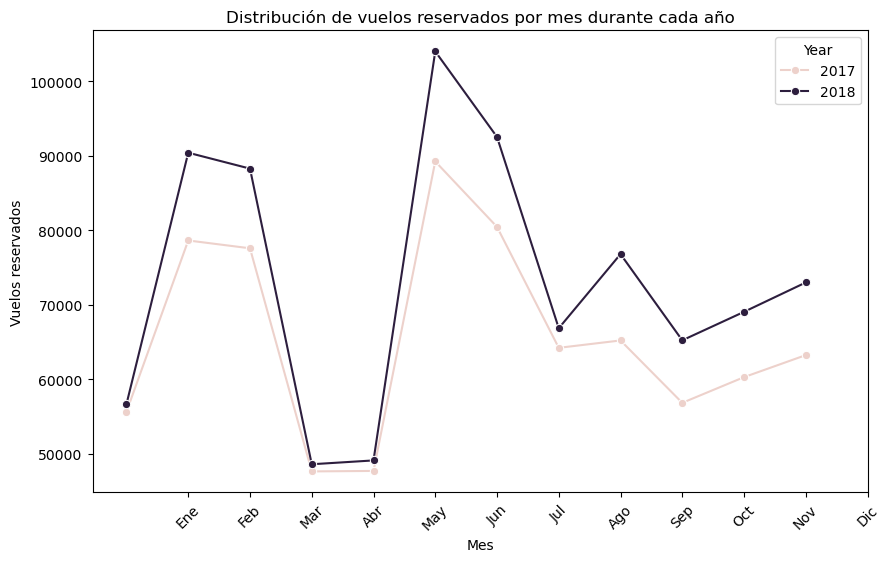

In [122]:
#Segundo paso, se realiza un gráfico de líneas que nos permite análizar los datos de los vuelos reservados en los diferentes meses, representando los años con las líneas.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Flights Booked', hue='Year', data=monthly_flights, marker='o')
plt.title('Distribución de vuelos reservados por mes durante cada año')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')

plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.show()

CONCLUSIÓN:
- La distribución de las reservas no han cambiado mucho durante los años 2017 & 2018 aunque si se observa un incremento en 2018
- Los meses con más reservas son: Enero, Febrero, Mayo y Junio, siendo sin duda Junio el mes con más reservas
- Por otro lado, los meses con valores más bajos de reserva son Marzo y Abril
- NOTA: Se observa interesante relacionarlo con los meses de vuelo. 

## 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

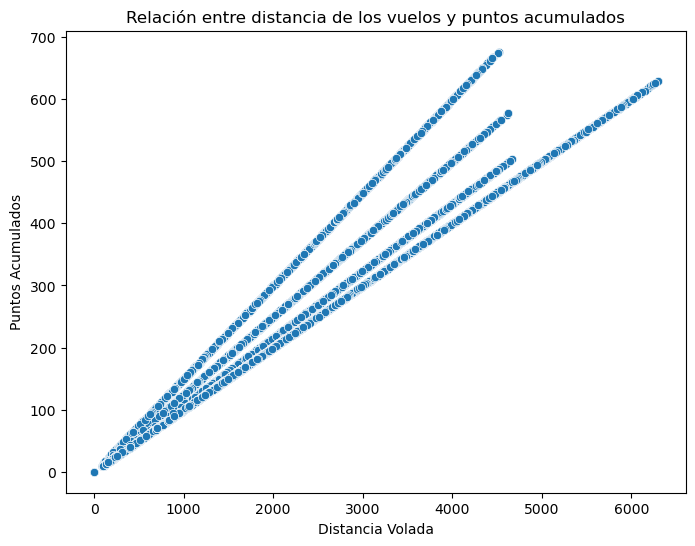

In [123]:
# En este caso, vamos a usar un diagrama de puntos para que nos muestre esa relación entre los vuelos y los puntos. Así, veremos la dispersión de los datos y si tiene relación real. 
# Para ello, el diagrama utilizado será scatterplot de seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_Loyalty)
plt.title('Relación entre distancia de los vuelos y puntos acumulados')
plt.xlabel('Distancia Volada')
plt.ylabel('Puntos Acumulados')
plt.show()

CONCLUSIONES:
- Se observa con claridad que hay una relación lineal. En la que cuánto mayor es la distancia mayor son los puntos acumulados. 

## 3. ¿Cuál es la distribución de los clientes por provincia o estado? Es decir, poder ver cuántos clientes hay en cada provincia.

In [124]:
# Primero, necesitamos contar la cantidad de clientes por provincia
province_counts = df_Loyalty['Province'].value_counts()
province_counts

Province
Ontario                 130138
British Columbia        106322
Quebec                   79429
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9837
Newfoundland              6196
Yukon                     2655
Prince Edward Island      1584
Name: count, dtype: int64

In [ ]:
# Para este caso, se decide representar el dato a través de una gráfica de pástel donde se podrá ver el % de clientes por provincia. 
# Por ello, se busca la tabla de colores que tiene matplotlib para escoger cual vamos a representar
colormaps = plt.colormaps()
print(colormaps)


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [126]:
# Una vez elegido el color, creamos la tabla de colores que se van a utilizar en el gráfico: 
colormap = plt.get_cmap("Pastel1", len(province_counts))  
colores = [colormap(i) for i in range(len(province_counts))]

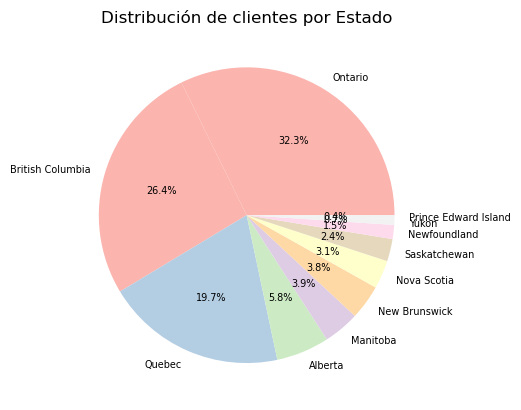

In [127]:
# Se crea el gráfico para su análisis. 
 
plt.pie(province_counts, 
        labels=province_counts.index, 
        autopct='%1.1f%%', 
        textprops={'fontsize':7},
        colors= colores)


plt.title("Distribución de clientes por Estado")
plt.show()

CONCLUSIONES: 
- Hay tres estados predominantes entre los clientes, que son: Ontario, British Columbia y Quebec, representando un total de 32,3%, 26,4% y 19,7%, correspondientemente. 
- Estos tres estados representan un 78,4% de los clientes
- El estado con menor representación son aquellos residentes en Prince Edward Island

## 4. Compara el salario promedio por nivel educativo.

In [129]:
df_Loyalty.dtypes

Loyalty Number                   int64
Year                             int64
Month                           object
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                object
Cancellation Year               object
Cancellation Month              object
dtype: object

In [211]:
# Primero, se procede a agrupar por nivel educativo para calcular el salario promedio de cada nivel.
Salary_by_education = df_Loyalty.groupby('Education')['Salary'].mean().round().reset_index()
Salary_by_education

,Education,Salary
0,Bachelor,72667.0
1,College,79259.0
2,Doctor,178404.0
3,High School or Below,61161.0
4,Master,103735.0


In [141]:
#Las ordenamos para que salga bien en el gráfico
Salary_by_education['Education'] = pd.Categorical(Salary_by_education['Education'], 
                                                  categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], 
                                                  ordered=True)

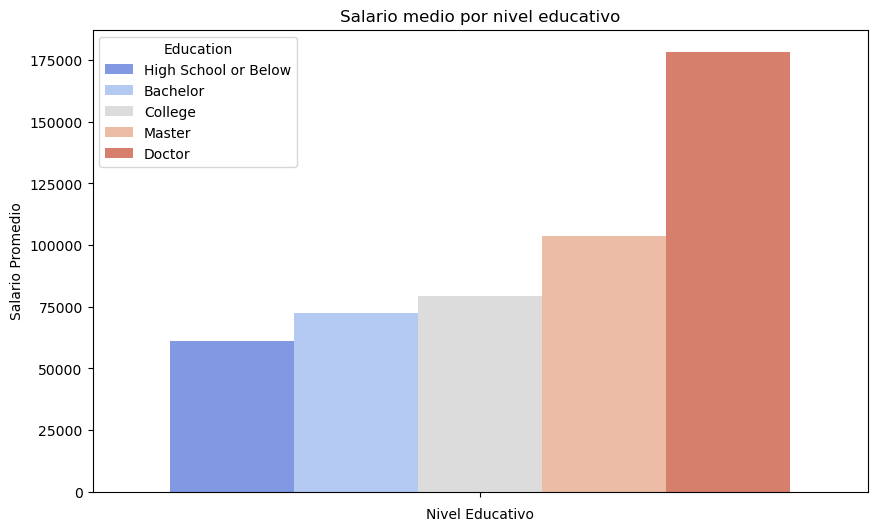

In [200]:
# Para analizar el salario medio en base al nivel educativo, se ha escogido un gráfico de barras. 

plt.figure(figsize=(10, 6))
sns.barplot(hue='Education', y= "Salary", data=Salary_by_education, palette="coolwarm")
plt.title('Salario medio por nivel educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Salary'>

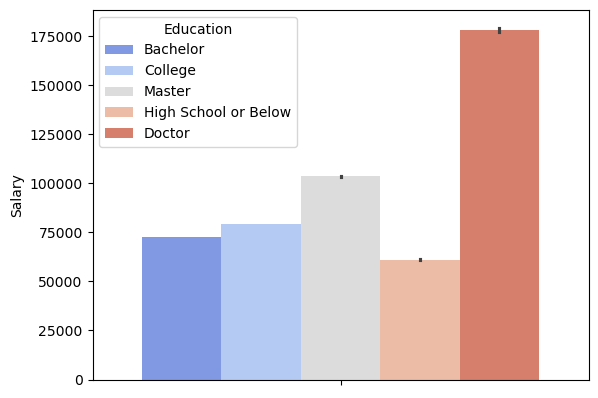

In [ ]:
# Se revisa si los datos son iguales sin hacer la media antes en un método y se ve que hay variación. Por lo que se entienden los resultados anteriores como los correctos para el análisis. 
sns.barplot(hue='Education', y='Salary', data=df_Loyalty , palette="coolwarm")

CONCLUSIONES:
- A mayor nivel educativo, mayor es el salario medio. 
- La diferencia más significativa con aquellas personas que tienen doctorado, siendo estos, los que poseen un salario medio más alto. 

## 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?



In [160]:
# Contar los clientes por tipo de tarjeta de fidelidad
customer_fidelity = df_Loyalty['Loyalty Card'].value_counts()
customer_fidelity

Loyalty Card
Star      183553
Nova      136667
Aurora     83060
Name: count, dtype: int64

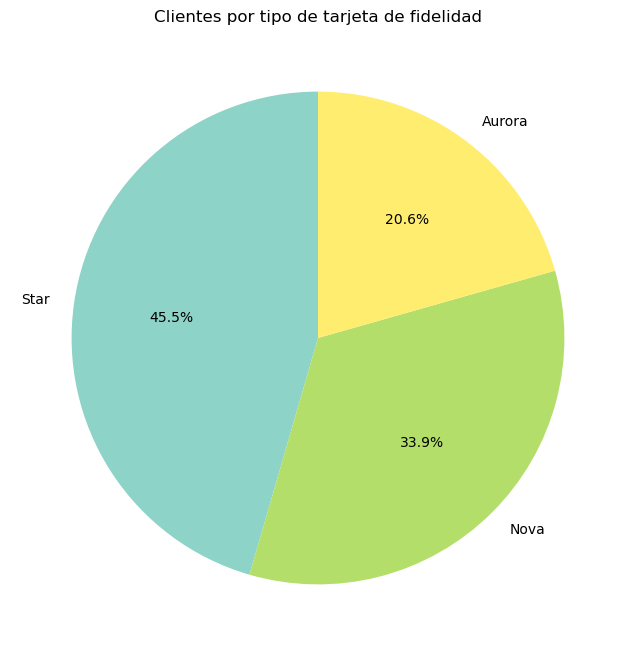

In [167]:
# Gráfico de pastel para visualizar el porcentaje
colormap = plt.get_cmap("Set3", len(customer_fidelity))  
colores = [colormap(i) for i in range(len(customer_fidelity))]


plt.figure(figsize=(8, 8))
customer_fidelity.plot.pie(autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Clientes por tipo de tarjeta de fidelidad')
plt.ylabel('')  # Eliminar etiqueta 'y'
plt.show()

CONCLUSIONES:
- El 45,5% de los clientes son tipo Star
- Le sigue los tipo Nova, representando un 33,9% de los clientes
- El tipo Aurora es el menos representado por los clientes con un 20,6%

## 6. ¿Cómo se distribuyen los clientes según su estado civil y género? Es decir, una gráfica donde vea a mis clientes separados por la categoría de estado civil y que en cada categoría vea cuáles son hombres y cuales mujeres.

In [204]:
marital_status_by_gender = df_Loyalty.groupby('Marital Status')['Gender'].value_counts().reset_index()
marital_status_by_gender

,Marital Status,Gender,count
0,Divorced,Female,30610
1,Divorced,Male,30104
2,Married,Male,117266
3,Married,Female,117219
4,Single,Female,54688
5,Single,Male,53393


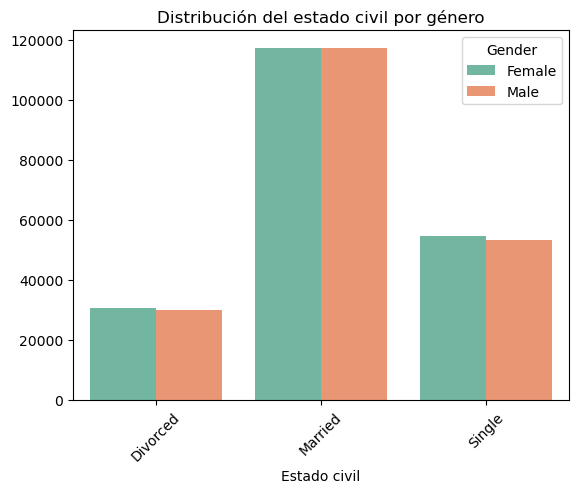

In [205]:
# Gráfico de barras apiladas

# Crear el gráfico de barras con los valores ordenados
sns.barplot(x='Marital Status', y= 'count', data= marital_status_by_gender, palette='Set2', hue = 'Gender')
plt.title('Distribución del estado civil por género')
plt.xlabel("Estado civil")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

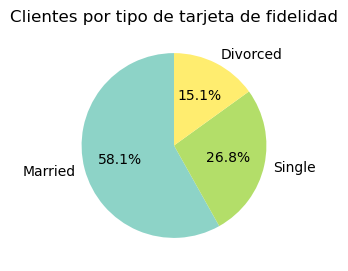

In [208]:
# Añadimos un gráfico pastel para saber los porcentajes, esta vez sin diferenciar por género ya que hemos visto que no tiene impacto

marital_status = df_Loyalty['Marital Status'].value_counts()

colormap = plt.get_cmap("Set3", len(marital_status))  
colores = [colormap(i) for i in range(len(marital_status))]


plt.figure(figsize=(3, 3))
marital_status.plot.pie(autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Clientes por tipo de tarjeta de fidelidad')
plt.ylabel('')  # Eliminar etiqueta 'y'
plt.show()

CONCLUSIONES: 
- No hay diferencias entre de la distribución por género
- El estado civil predominante es el "Casado", representando un 58,1% sobre el total de los clientes. 
